In [1]:
from datasets import load_dataset
import re
from collections import Counter
import matplotlib.pyplot as plt

ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [2]:
ds_dict = ds['corpus']
texts = ds_dict['text']

In [3]:
# regex for time in format 20:30
#time_re = re.compile("\d{1,2}:\d{2}")
time_re = re.compile("([01]\d|2[0-3]):\d{2}")
data_re = re.compile(r"((\d{1,2})\s((stycz|kwiet|sierp|wrześ|grud)nia|(mar|lip|czerw)ca|listopada|października|lutego|maj))")

In [4]:
time_finds = []
data_finds = []
for row in texts:
    t = re.findall(time_re, row)
    d = re.findall(data_re, row)
    if t:
        time_finds.extend(t)
    if d:
        data_finds.extend(d)
    #break
data_finds = [x[0] for x in data_finds if x]
time_finds = [x for x in time_finds if x]

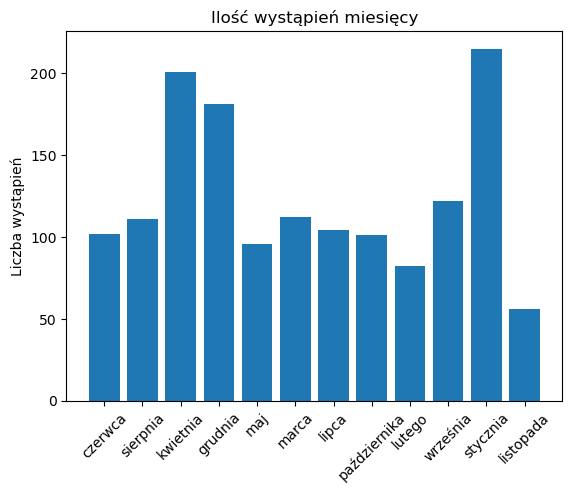

In [5]:
month_counts = Counter()

for date in data_finds:
    parts = date.split(' ', 1)  
    if len(parts) == 2:  
        month = parts[1]  
        month_counts[month] += 1  

months = list(month_counts.keys())
counts = list(month_counts.values())

plt.bar(months, counts)
plt.ylabel('Liczba wystąpień')
plt.title('Ilość wystąpień miesięcy')
plt.xticks(rotation=45)
plt.show()

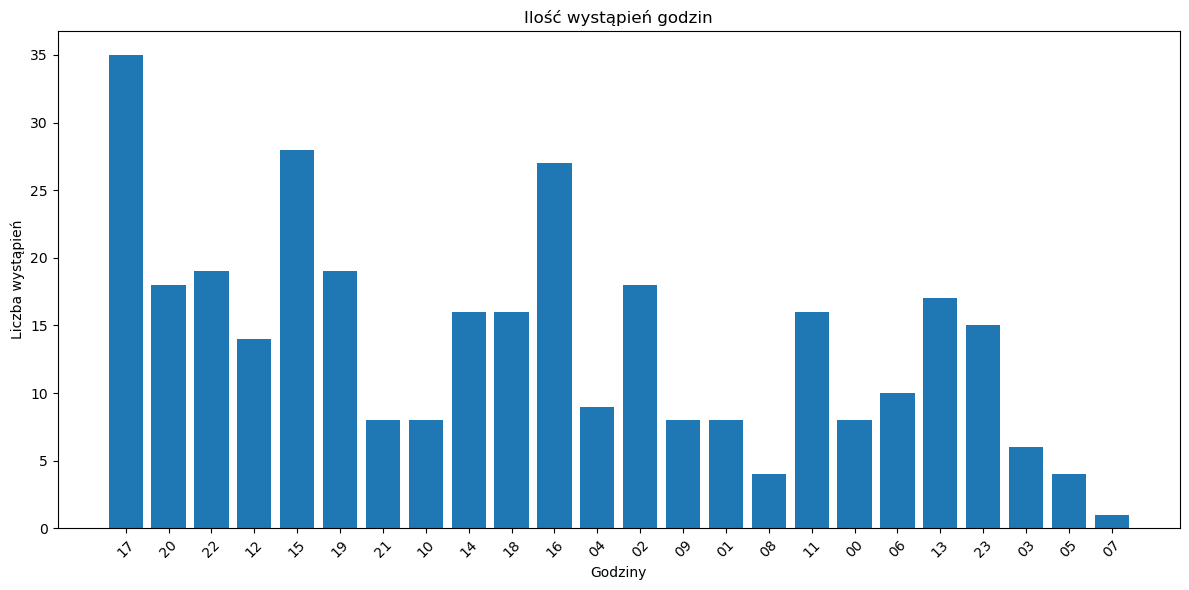

In [6]:
hours_counts = Counter()

for time in time_finds:
    hour = time.split(':')[0] 
    hours_counts[hour] += 1  

hours = list(hours_counts.keys())
counts = list(hours_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(hours, counts)
plt.xlabel('Godziny')
plt.ylabel('Liczba wystąpień')
plt.title('Ilość wystąpień godzin')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


In [7]:
# Kwiecien:
#kwiecien_re = re.compile(r"kwie(cień|tniu|tnia)")
kwiecien_re = re.compile(r"kwie(tni(u|a)|cień)")
kwiecien_finds = []
for row in texts:
    for match in re.finditer(kwiecien_re, row):
        kwiecien_finds.append(match.group(0))
kwiecien_finds = [x for x in kwiecien_finds if x]

len(kwiecien_finds)

348

In [8]:
## As in 4, but preceded by a number and a space
kwiecien_re_number = re.compile(r"(?<=\d )(kwie(tni(u|a)|cień))")
kwiecien_number_finds = []
for row in texts:
    matches = re.findall(kwiecien_re_number, row)
    for match in matches:
        kwiecien_number_finds.append(match[0])
kwiecien_number_finds = [x for x in kwiecien_number_finds if x]
print(len(kwiecien_number_finds))
#kwiecien_number_finds

201


In [9]:
#As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.
#kwiecien_re_number = re.compile(r"((?<!\d\s)kwie(cień|tn[iuoa]))")
kwiecien_re_number = re.compile(r"(?<!\d )(kwie(tni(u|a)|cień))")
kwiecien_without_number = []
for row in texts:
    matches = re.findall(kwiecien_re_number, row)
    for match in matches:
        kwiecien_without_number.append(match[0])
kwiecien_without_number = [x for x in kwiecien_without_number if x]
print(len(kwiecien_without_number))

147


In [10]:
print(len(kwiecien_without_number) + len(kwiecien_number_finds) == len(kwiecien_finds))

True


In [11]:
# suma (numer + spacja + kwiecien) oraz ( nie(numer + spacja) + kwiecien) = kwiecien -> zgadza się.
# Warto zauwazyć co tutaj sie nasuneło, minaowiscie we wzorcu z numerem (mozna wnioskowac ze to pelna data mamy odmiane 'kwietnia' co zgadza sie z intuicja np 17 kwietnia
# a gdy mamy bez numeru mamy 'kwietniu' lub 'kwiecień' wtedy zazwyczaj mowimy o dacie bardziej ogolnie np. Zrobie to w kwietniu, lub np. po maju jest kwiecien

In [12]:
kwiecien_without_number[-10:]

['kwietniu',
 'kwietniu',
 'kwietniu',
 'kwietnia',
 'kwiecień',
 'kwietniu',
 'kwietnia',
 'kwietnia',
 'kwietnia',
 'kwietnia']

In [13]:
# Bielik query:
"""Napisz dla mnie 5 regexów:
1 - wyodrębnianie czasów, np. rozpoznawanie godziny 20:30 jako czasu.
2 -wyodrębnianie dat, np. rozpoznawanie 20 września jako instancji daty.
3 - Oblicz liczbę wystąpień słowa kwiecień w dowolnej formie fleksyjnej. Użyj zwartej formy dla zapytania (tj. łączenie wszystkich form słowa przez alternatywę jest zabronione).
4 - jak w 4  ale poprzedzone liczba i spacja
5 - jak w 4 ale NIE poprzedzone liczba i spacja """

'Napisz dla mnie 5 regexów:\n1 - wyodrębnianie czasów, np. rozpoznawanie godziny 20:30 jako czasu.\n2 -wyodrębnianie dat, np. rozpoznawanie 20 września jako instancji daty.\n3 - Oblicz liczbę wystąpień słowa kwiecień w dowolnej formie fleksyjnej. Użyj zwartej formy dla zapytania (tj. łączenie wszystkich form słowa przez alternatywę jest zabronione).\n4 - jak w 4  ale poprzedzone liczba i spacja\n5 - jak w 4 ale NIE poprzedzone liczba i spacja '

In [14]:
# regexy z LLM:
time_llm = re.compile('\d{1,2}:\d{2}')
data_llm = re.compile("\d{1,2} (styczeń|luty|marzec|kwiecień|maj|czerwiec|lipiec|sierpień|wrzesień|październik|listopad|grudzień)")
kwiecien_llm = re.compile("kwieci?e?ń|kwietnia")
kwiecien_number_llm = re.compile("\d+ kwieci?e?ń|kwietnia")
kwiecien_no_number_llm = re.compile('kwieci?e?ń|kwietnia')

# Wnioski i odpowiedzi na pytania

Are regular expressions good at capturing times?
Are regular expressions good at capturing dates?
How one can be sure that the expression has matched all and only the correct expressions of a given type?
Is LLM able to generate regular expressions?

Capturing times - moim zdaniem tak, zapis czasu jest dość mocno ustrukturyzowany zarowno w języku polskim jak i angielskim, przez co nie ma aż tak dużo wariancji tworzenia wyrażenia regularnego, oczywiscie jest kilka rzeczy kte nalezy miec na uwadze jak np zapis godziny 13:20 i 1.20 może znaczyć to samo, czy końcówki z anglieksiego pm am. Jednak mimoo wszyskto regex wydaje sie byc dobrym do wyszukania czegos takiego jak godzina.

Capturing dates - tutaj juz wiekszy problem, z cala pewnoscia zadanie znaaacznie latwiejsze dla jezyka angielskiego  z oczywistych wzgledow - mala liczba odmian. W jezyku polskim mamy ich ogrom co mocno komplikuje sprawe, z cwiczenia wynika ze w pewnym stopniu jestesmy w stanie wylapywac daty jednak jesto zagadnienie bardziej zlozone i nalezy miec się na uwadze. Mysle ze jednak mimo wszystko w wiekszosci przypadkow, odpowiednio dobrany i skomplikowany regex obsluzy wyszukiwanie dat.

Be sure - przeglądając wyniki i analizujac czy pasuja do tego czego szukamy, moze warto byloby utworzyc jakis probny dataset i porownywac z nim, przydatne moze sie okazac ogladanie slow przed/za wyszukana fraza.Po prostu nalezy sprawdzac wyniki.

LLM - slabo, mowiac szczerze zawiodlem sie na BIelku, jego regexy znajda praktycznie 1/2 opcji odmiany. Nie uwzglednia zastosowania funkcji biblioteki regex a jedynie chce dopasowac 1:1 regexa do tekstu. Testowalem tez z GPT i tutaj znacznie lepiej, jednak jego regexy tez wymagaja uwagi i kontroli bo probowal wypisywac wszystkie odmiany, lub mieszal z iloscia liczb, nie pamietal o tym aby wykluczyc np godzine 50, generalnie dziala, ale trzeba to bacznie kontrolowac.